In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Original temperature data points
original_data = np.array([30, 32, 35, 33, 31, 30, 29, 28, 30, 31, 32, 34])
original_data = original_data.reshape(-1, 1)

In [3]:
# Generator model
def build_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_dim=100))
    model.add(layers.Dense(1, activation='linear'))
    return model

# Discriminator model
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_dim=1))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [4]:
def compile_gan(generator, discriminator):
    discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    discriminator.trainable = False
    gan_input = layers.Input(shape=(100,))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    
    gan = tf.keras.models.Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    
    return gan

In [5]:
def train_gan(gan, generator, discriminator, original_data, epochs=1000, batch_size=8):
    for epoch in range(epochs):
        # Train discriminator
        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_data = generator.predict(noise)
        real_data = original_data[np.random.randint(0, original_data.shape[0], batch_size)]
        
        combined_data = np.vstack((real_data, generated_data))
        labels = np.ones((2 * batch_size, 1))
        labels[batch_size:] = 0
        
        discriminator.trainable = True
        discriminator.train_on_batch(combined_data, labels)
        
        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        labels = np.ones((batch_size, 1))
        discriminator.trainable = False
        gan.train_on_batch(noise, labels)
        
        if epoch % 100 == 0:
            print(f"Epoch: {epoch}")

Epoch: 0
Epoch: 100
Epoch: 200
Epoch: 300
Epoch: 400
Epoch: 500
Epoch: 600
Epoch: 700
Epoch: 800
Epoch: 900


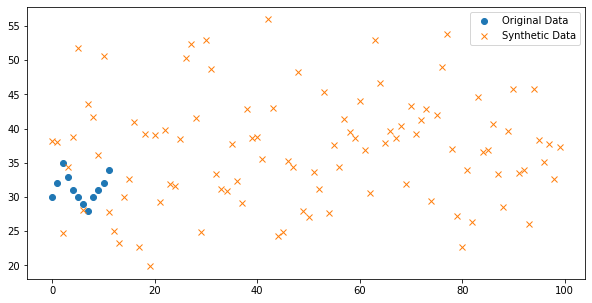

In [8]:
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, 100))
    synthetic_data = generator.predict(noise)
    return synthetic_data

# Build and compile GAN
generator = build_generator()
discriminator = build_discriminator()
gan = compile_gan(generator, discriminator)

# Train GAN
train_gan(gan, generator, discriminator, original_data)

# Generate synthetic data
num_samples = 100
synthetic_data = generate_synthetic_data(generator, num_samples)

# Plot the original and synthetic data
plt.figure(figsize=(10, 5))
plt.plot(original_data, 'o', label='Original Data')
plt.plot(synthetic_data, 'x', label='Synthetic Data')
plt.legend()
plt.show()